In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
x = np.linspace(0, 1, 101)
truth = lambda x: np.sin(2 * np.pi * x)

N=11
np.random.seed(100)
xs = np.linspace(0, 1, N)
std = 0.25
y = truth(xs) + std * np.random.randn(N)

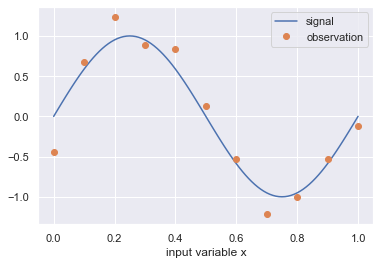

In [3]:
plt.plot(x, truth(x), label='signal')
plt.plot(xs, y, 'o', label='observation')
plt.xlabel('input variable x')
plt.legend()

# Bayesian polynomial regression

This approach is suitable for visualizing regression features.

In [4]:
X = xs[:, np.newaxis] # cast one-dimensional input vector to feature matrix

In [5]:
from dslab.bayesreg import BayesianPolynomialRegression

poly_reg = BayesianPolynomialRegression()

/opt/anaconda3/envs/dslab/bin/python
{'numpy': '1.19.1', 'pandas': '1.1.3', 'seaborn': '0.11.0', 'sklearn': '0.23.2', 'matplotlib': '3.3.1'}


In [6]:
poly_reg.fit(X, y)

BayesianPolynomialRegression()

In [7]:
ppd = poly_reg.predict_ppd(x[:, np.newaxis])

In [8]:
type(ppd[0])

scipy.stats._distn_infrastructure.rv_frozen

In [9]:
from dslab.metrics import crps
crps(y, poly_reg.predict_ppd(X))

0.09448060109260735

In [10]:
from dslab.visualization.bayes import plot_posterior_predictive

In [11]:
plot_posterior_predictive(ppd, x, signal=truth(x))
plt.legend()

# Visualize regression feature

In [12]:
from dslab.visualization.bayes import regression 

plt.plot(xs, y, 'ro', label='observation')
regression(xs, y)

# Multivariate Bayesian regression


In [13]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from dslab.bayesreg import BayesianLinearRegression

In [14]:
preprocessing = make_pipeline(#StandardScaler(),
                              PolynomialFeatures(degree=10))
Xpoly = preprocessing.fit_transform(X)
Xtest = preprocessing.transform(x[:, np.newaxis])

In [15]:
reg = BayesianLinearRegression(alpha=0.001)
reg.fit(Xpoly, y)

BayesianLinearRegression()

In [16]:
ppd = reg.predict_ppd(Xtest)

In [17]:
plot_posterior_predictive(ppd, x, signal=truth(x))
plt.plot(xs, y, 'ro', label='observation')
plt.xlabel('independent variable x')
plt.legend()

In [18]:
crps(y, reg.predict_ppd(Xpoly))

0.09448060109261251

# BayesianRidge regression as implemented by scikit-learn
## Configure precision of weights similar to previous experiments

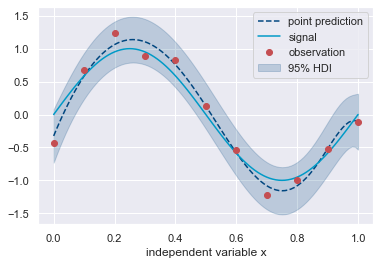

In [19]:
Xpoly = preprocessing.fit_transform(X)
Xtest = preprocessing.transform(x[:, np.newaxis])

from dslab.bayesreg import BayesianRidge

reg_skl = BayesianRidge(lambda_init=0.001,  # precision of weights 
                        fit_intercept=False  # intercept is given as first column of Xpoly
                       )
reg_skl.fit(Xpoly, y)

ppd_BR = reg_skl.predict_ppd(Xtest)

plot_posterior_predictive(ppd_BR, x, signal=truth(x))
plt.plot(xs, y, 'ro', label='observation')
plt.xlabel('independent variable x')
plt.legend()


In [20]:
crps(y, reg_skl.predict_ppd(Xpoly))

0.06843916663648562